In [2]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os

# Regression import
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.metrics import accuracy_score

# Configure code auto-completion
%config Completer.use_jedi = False

# Set working directory
os.chdir('/notebooks/ml project/')

In [3]:
data = pd.read_csv("new_csv.csv") 

In [4]:
# Define the feature vector by non-feature columns
x = (data.drop(["name", "album", "popularity"], axis=1))

# Define the label 
y = data["popularity"]

In [5]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

In [6]:
n_and_rmses = {}
for n in range(10, 1000, 10):
    # Initializing the Random Forest Regression model 
    model = RandomForestRegressor(n_estimators = n, random_state = 0)

    # Fitting the Random Forest Regression model to the data
    model.fit(x_train, y_train)

    # Predicting the target values of the test set
    y_pred = model.predict(x_test)

    # RMSE (Root Mean Square Error)
    rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    n_and_rmses[n] = rmse
    print("\nRMSE: ", rmse, "for n=", n)


RMSE:  11.873 for n= 10

RMSE:  11.441 for n= 20

RMSE:  11.17 for n= 30

RMSE:  10.908 for n= 40

RMSE:  10.887 for n= 50

RMSE:  10.834 for n= 60

RMSE:  10.71 for n= 70

RMSE:  10.771 for n= 80

RMSE:  10.744 for n= 90

RMSE:  10.704 for n= 100

RMSE:  10.687 for n= 110

RMSE:  10.685 for n= 120

RMSE:  10.686 for n= 130

RMSE:  10.68 for n= 140

RMSE:  10.711 for n= 150

RMSE:  10.722 for n= 160

RMSE:  10.705 for n= 170

RMSE:  10.682 for n= 180

RMSE:  10.653 for n= 190

RMSE:  10.648 for n= 200

RMSE:  10.647 for n= 210

RMSE:  10.644 for n= 220

RMSE:  10.642 for n= 230

RMSE:  10.649 for n= 240

RMSE:  10.642 for n= 250

RMSE:  10.608 for n= 260

RMSE:  10.604 for n= 270

RMSE:  10.58 for n= 280

RMSE:  10.58 for n= 290

RMSE:  10.575 for n= 300

RMSE:  10.592 for n= 310

RMSE:  10.594 for n= 320

RMSE:  10.605 for n= 330

RMSE:  10.601 for n= 340

RMSE:  10.591 for n= 350

RMSE:  10.597 for n= 360

RMSE:  10.604 for n= 370

RMSE:  10.589 for n= 380

RMSE:  10.585 for n= 390


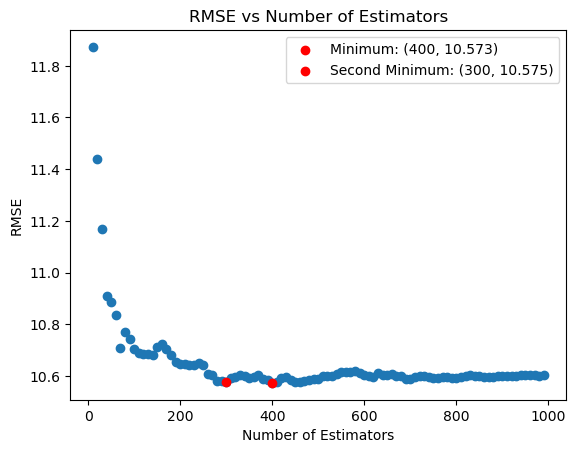

Minimum RMSE: 10.573 at Number of Estimators = 400
Second Minimum RMSE: 10.575 at Number of Estimators = 300


In [11]:
import matplotlib.pyplot as plt


# Extract keys and values from the dictionary
x_cord = list(n_and_rmses.keys())
y_cord = list(n_and_rmses.values())

# Find the minimum and second minimum RMSE values along with their corresponding number of estimators
sorted_indices = sorted(range(len(y_cord)), key=lambda k: y_cord[k])
min_rmse_idx, second_min_rmse_idx = sorted_indices[:2]
min_rmse = y_cord[min_rmse_idx]
min_estimators = x_cord[min_rmse_idx]
second_min_rmse = y_cord[second_min_rmse_idx]
second_min_estimators = x_cord[second_min_rmse_idx]

# Create a scatter plot
plt.scatter(x_cord, y_cord)

# Highlight the minimum and second minimum points
plt.scatter(min_estimators, min_rmse, color='red', label=f'Minimum: ({min_estimators}, {min_rmse})')
plt.scatter(second_min_estimators, second_min_rmse, color='red', label=f'Second Minimum: ({second_min_estimators}, {second_min_rmse})')

# Set plot labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Estimators')

# Show the plot with legend
plt.legend()
plt.show()

print(f"Minimum RMSE: {min_rmse} at Number of Estimators = {min_estimators}")
print(f"Second Minimum RMSE: {second_min_rmse} at Number of Estimators = {second_min_estimators}")
